In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
# Loading data
file_path = Path("../Resources/final_features_4.csv")
soy = pd.read_csv(file_path)
soy.head()

,Unnamed: 0,county_code,county_name,state_ansi,state_name,state_alpha,commodity_desc,state_fips_code,year,area_harvested,...,total_imdemnity,total_events,PCP,TAVG,PDSI,ZNDX,PMDI,TMIN,TMAX,Month
0,0,21,BUENA VISTA,19,IOWA,IA,SOYBEANS,19,2018,143300,...,87432,15,3.756667,47.491667,2.521667,1.810833,2.03,37.783333,57.175,6.5
1,1,35,CHEROKEE,19,IOWA,IA,SOYBEANS,19,2018,133800,...,26361,9,3.756667,47.491667,2.521667,1.810833,2.03,37.783333,57.175,6.5
2,2,41,CLAY,19,IOWA,IA,SOYBEANS,19,2018,128600,...,261792,24,3.756667,47.491667,2.521667,1.810833,2.03,37.783333,57.175,6.5
3,3,59,DICKINSON,19,IOWA,IA,SOYBEANS,19,2018,85800,...,112899,9,3.756667,47.491667,2.521667,1.810833,2.03,37.783333,57.175,6.5
4,4,63,EMMET,19,IOWA,IA,SOYBEANS,19,2018,88800,...,345711,33,3.756667,47.491667,2.521667,1.810833,2.03,37.783333,57.175,6.5


In [6]:
soy.columns

Index(['Unnamed: 0', 'county_code', 'county_name', 'state_ansi', 'state_name',
       'state_alpha', 'commodity_desc', 'state_fips_code', 'year',
       'area_harvested', 'area_planted', 'production', 'YIELD', 'total_acres',
       'total_imdemnity', 'total_events', 'PCP', 'TAVG', 'PDSI', 'ZNDX',
       'PMDI', 'TMIN', 'TMAX', 'Month'],
      dtype='object')

In [7]:
soy = soy.drop(columns=['Unnamed: 0', 'county_code', 'county_name', 'state_ansi', 'state_name',
       'state_alpha', 'commodity_desc', 'state_fips_code', 'year','area_planted','YIELD', 'total_acres',
       'total_imdemnity', 'total_events', 'PCP', 'TAVG', 'PDSI', 'ZNDX',
       'PMDI', 'TMIN', 'TMAX', 'Month'])
soy.head()

,area_harvested,production
0,143300,8099000
1,133800,8767000
2,128600,6889000
3,85800,4350000
4,88800,4222000


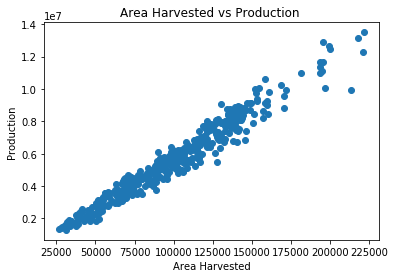

In [9]:
plt.scatter(soy.area_harvested, soy.production)
plt.title('Area Harvested vs Production ')
plt.ylabel('Production')
plt.xlabel('Area Harvested')
plt.show()

In [10]:
X = soy.area_harvested.values.reshape(-1, 1)
X[:5]

array([[143300],
       [133800],
       [128600],
       [ 85800],
       [ 88800]], dtype=int64)

In [11]:
# The shape of X is 482 samples, with a single feature (column)
X.shape

(482, 1)

In [12]:
y = soy.production

In [13]:
# Create a model with scikit-learn
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# The slope
print(model.coef_)

[60.36964128]


In [16]:
# The y-intercept
print(model.intercept_)

-395150.92684433237


In [17]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)

In [6]:
sort=soy.set_index('area_harvested').sort_index()
sort.head()

,production
area_harvested,
27000,1326000
27900,1420000
28900,1473000
30400,1539000
30500,1565000
